[[ 0.14213381 -0.06524823]
 [-0.28426762 -0.45673764]
 [ 0.99493668  1.04397175]
 [ 0.56853524  0.45673764]
 [-1.13707049 -1.10921998]
 [-1.77667264 -1.50070939]
 [-0.71066905 -0.78297881]
 [ 1.42133811  1.69645409]
 [ 0.78173596  0.71773058]]
[1 1 0 0 0 1 1 0 0]
Confusion Matrix : 
 [[5 0]
 [0 4]]
Accuracy :  1.0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


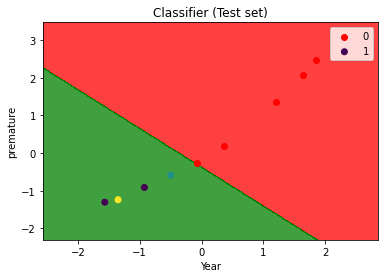

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
dataset = pd.read_csv('C:/Users/asus/Desktop/my patents/pupil vs wmc project/d1global.csv')
# input
mean_value=dataset['year'].mean()
mean_value1=dataset['diahorrea'].mean()
mean_value2=dataset['hiv'].mean()
mean_value3=dataset['malaria'].mean()
mean_value4=dataset['measels'].mean()
mean_value5=dataset['meningitis'].mean()




mean_value10=0
  
# Replace NaNs in column S2 with the
# mean of values in the same column
dataset['year'].fillna(value=mean_value, inplace=True)
mean_value1=dataset['diahorrea'].mean()
mean_value2=dataset['hiv'].mean()
mean_value3=dataset['malaria'].mean()
mean_value4=dataset['measels'].mean()
mean_value5=dataset['meningitis'].mean()
mean_value6=dataset['other'].mean()
mean_value7=dataset['premature'].mean()
mean_value8=dataset['sepasis'].mean()
mean_value9=dataset['teatnus'].mean()



dataset['decision'].fillna(value=mean_value10, inplace=True)

x = dataset.iloc[:,[0,1]].values


# output
y = dataset.iloc[:, 11].values
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
		x, y, test_size = 0.5, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

 
print (xtrain[0:100, :])

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)

classifier.fit(xtrain, ytrain)



y_pred = classifier.predict(xtest)
print(y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)

print ("Confusion Matrix : \n", cm)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))
from matplotlib.colors import ListedColormap
X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
							stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
							stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(
			np.array([X1.ravel(), X2.ravel()]).T).reshape(
			X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green'))(i), label = j)
	
plt.title('Classifier (Test set)')
plt.xlabel('Year')
plt.ylabel('premature')
plt.legend()
plt.show()




In [44]:
np.isnan(dataset.any()) #and gets False
np.isfinite(dataset.all()) #and gets True

wmc      True
pupil    True
TRUE     True
dtype: bool

In [48]:
print(dataset['wmc'].isnull().sum())
print(dataset['pupil'].isnull().sum())
print(dataset['TRUE'].isnull().sum())

1
1
1


In [51]:
mean_value=dataset['wmc'].mean()
mean_value=dataset['pupil'].mean()
mean_value=dataset['TRUE'].mean()
  
# Replace NaNs in column S2 with the
# mean of values in the same column
dataset['wmc'].fillna(value=mean_value, inplace=True)
dataset['pupil'].fillna(value=mean_value, inplace=True)
dataset['TRUE'].fillna(value=mean_value, inplace=True)

In [52]:
print(dataset['wmc'].isnull().sum())
print(dataset['pupil'].isnull().sum())
print(dataset['TRUE'].isnull().sum())

0
0
0
